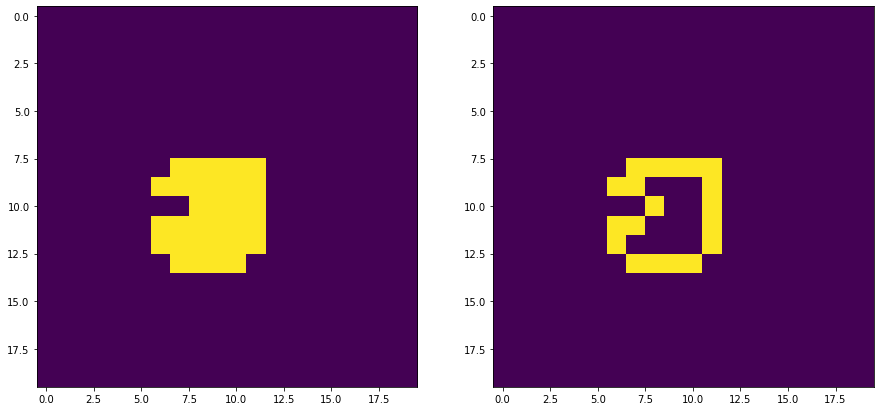

In [104]:
import matplotlib.pyplot as plt

test_array = np.zeros([20,20])
test_array[8:14,6:12] = 1
test_array[8:9,6] = 0
test_array[13,11] = 0
test_array[13,6] = 0
test_array[10,:8] = 0


fig,ax=plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(test_array)
ax[1].imshow(np.logical_xor(test_array,binary_erosion(test_array)))


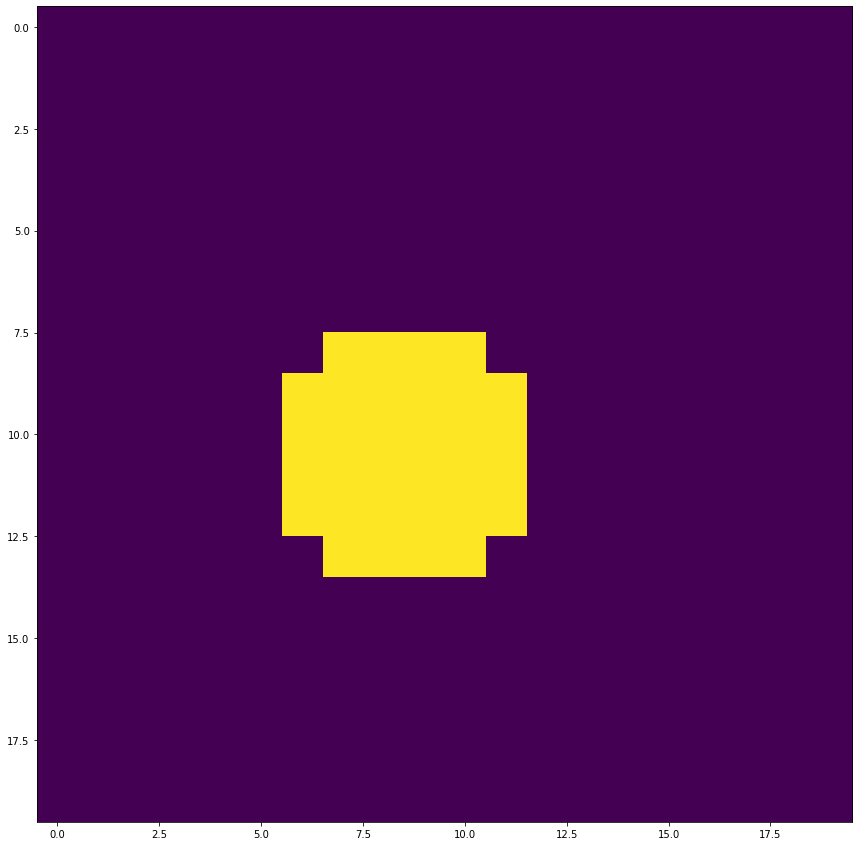

In [273]:
import matplotlib.pyplot as plt

test_array = np.zeros([20,20])
test_array[8:14,6:12] = 1
test_array[8:9,6] = 0
test_array[13,11] = 0
test_array[8,11] = 0

test_array[13,6]= 0



fig,ax=plt.subplots(1, figsize=(15,15))
ax.imshow(test_array)


In [266]:
def left_border_pixel(array, pos):
    return array[pos[0], pos[1]-1] == 0

def right_border_pixel(array, pos):
    return array[pos[0], pos[1]+1] == 0

def top_border_pixel(array, pos):
    return array[pos[0]-1, pos[1]] == 0

def bottom_border_pixel(array, pos):
    return array[pos[0]+1, pos[1]] == 0

def get_outline_arrays(array):
    outline = np.logical_xor(array,binary_erosion(array))

    where = np.array(np.where(outline))
    top_edge = np.zeros(array.shape)
    right_edge = np.zeros(array.shape)
    bottom_edge = np.zeros(array.shape)
    left_edge = np.zeros(array.shape)
    
    for y, x in where.T:
        assert array[y,x] == True
        if left_border_pixel(array, [y,x]):
            left_edge[y,x] = 1
        if right_border_pixel(array, [y,x]):
            right_edge[y,x] = 1
        if top_border_pixel(array, [y,x]):
            top_edge[y,x] = 1
        if bottom_border_pixel(array, [y,x]):
            bottom_edge[y,x] = 1
    return top_edge, right_edge, bottom_edge, left_edge

In [267]:
def trace(array, top_edge, right_edge, bottom_edge, left_edge):  
    policy = "right"
    y, x = np.array(np.where(top_edge==1)).T[0]
    while True:
        print(policy)
        for x1, ax in zip([top_edge, right_edge, bottom_edge, left_edge],plt.subplots(1,4, figsize=(20,20))[1]):
            ax.imshow(x1)
        plt.show()
        if policy == "right":
            top_edge[y,x] = 0
            if top_edge[y,x+1] == 1:#go right
                y, x = [y,x+1]
                continue
            else:
                policy = "down"
                continue
                
        if policy == "down":
            if right_edge[y+1, x] == 1:
                print("down")
                right_edge[y,x] = 0
                y, x = [y+1,x]
                continue
            else:
                policy = "left"
                break
        
        break#no neighboring pixel, nowhere to go  

In [268]:
import matplotlib.pyplot as plt

test_array = np.zeros([20,20])
test_array[8:14,6:12] = 1
test_array[8:9,6] = 0
test_array[13,11] = 0
test_array[13,6]= 0
test_array[14:15,8:10] = 1

In [274]:
top_edge, right_edge, bottom_edge, left_edge = get_outline_arrays(test_array)

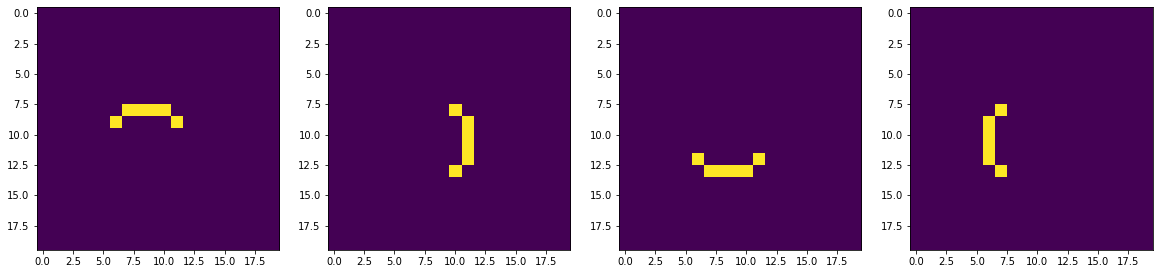

In [275]:
for x, ax in zip([top_edge, right_edge, bottom_edge, left_edge],plt.subplots(1,4, figsize=(20,20))[1]):
    ax.imshow(x)

In [276]:
right_edge[8,11]

0.0

right


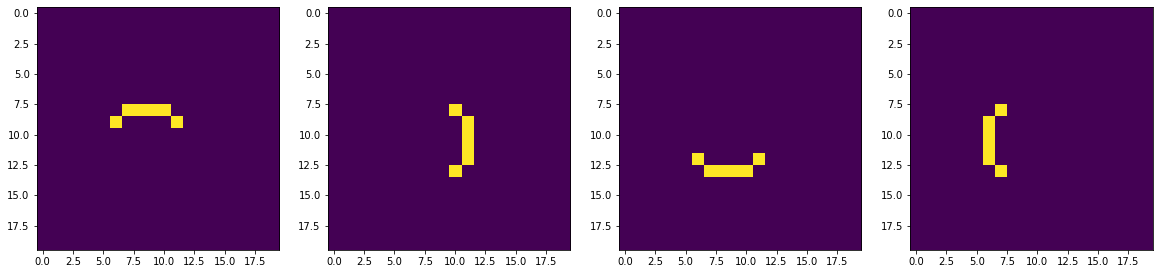

right


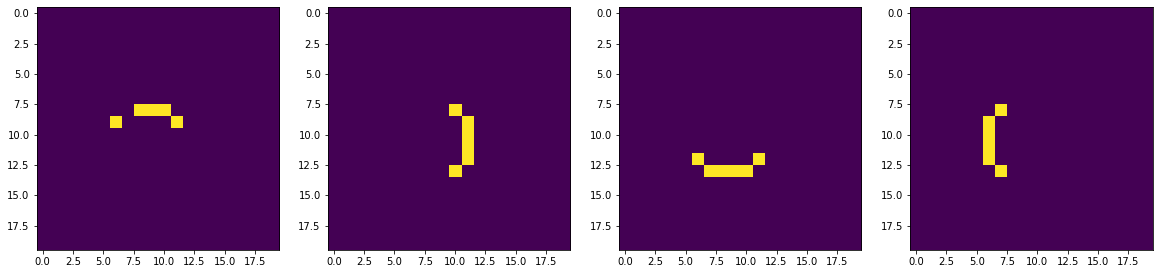

right


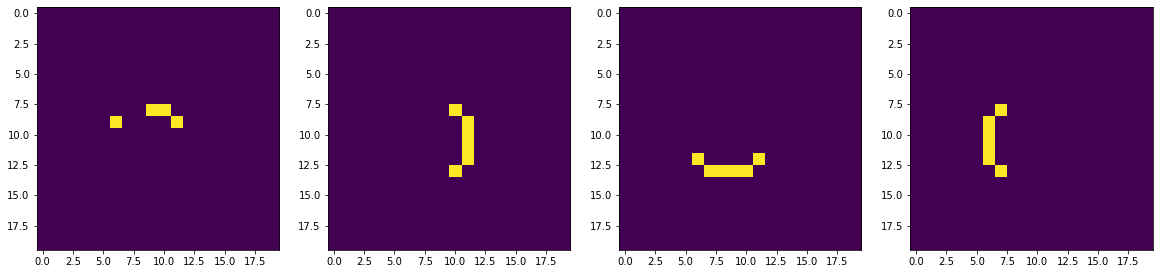

right


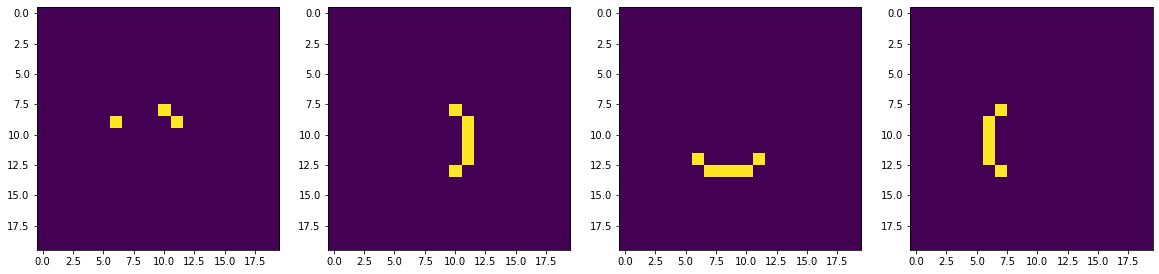

down


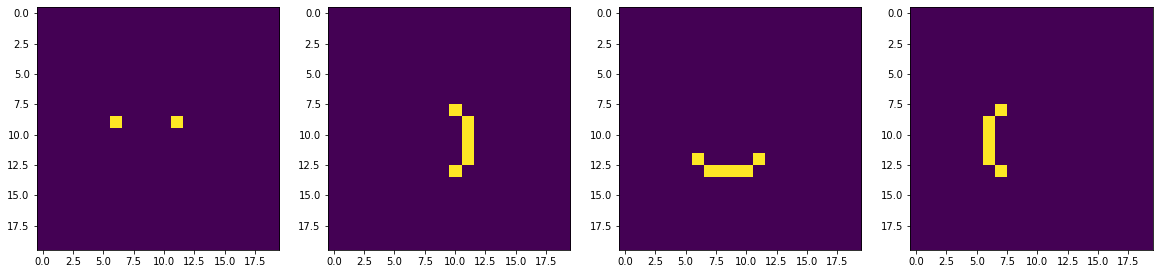

In [277]:
top_edge, right_edge, bottom_edge, left_edge = get_outline_arrays(test_array)
trace_outline = trace(test_array, top_edge, right_edge, bottom_edge, left_edge)

In [88]:
import matplotlib.pyplot as plt

y,x = np.array(trace).T

fig,ax=plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(test_array)
ax[1].imshow(test_array)
plt.scatter(x, y, color ="r")

ValueError: not enough values to unpack (expected 2, got 0)

In [55]:
trace = np.array(trace)

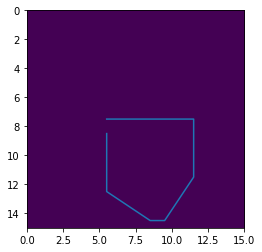

In [56]:
fig, ax = plt.subplots()
ax.imshow(outline)
ax.set_ylim(0,15)
ax.set_xlim(0,15)
ax.invert_yaxis()
ax.plot(trace[:,1],trace[:,0])

In [32]:
trace

array([[ 7.5,  5.5],
       [ 7.5,  6.5],
       [ 7.5,  6.5],
       [ 7.5,  7.5],
       [ 7.5,  7.5],
       [ 7.5,  8.5],
       [ 7.5,  8.5],
       [ 7.5,  9.5],
       [ 7.5,  9.5],
       [ 7.5, 10.5],
       [ 7.5, 11.5],
       [ 8.5, 11.5],
       [ 8.5, 11.5],
       [ 9.5, 11.5],
       [ 9.5, 11.5],
       [10.5, 11.5],
       [10.5, 11.5],
       [11.5, 11.5],
       [14.5,  9.5],
       [14.5,  8.5],
       [12.5,  6.5],
       [12.5,  5.5],
       [11.5,  6.5],
       [11.5,  5.5],
       [10.5,  6.5],
       [10.5,  5.5],
       [ 9.5,  6.5],
       [ 9.5,  5.5]])